**Problem 2(a)&(b)**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.ion()

class BaryInterp(object):
    def __init__(self,x,f,weights=None):
        self.x = x
        self.f = f
        self.weights = np.zeros(len(x))
        if weights is not None: self.weights = weights  #from the optional argument
        else: self.calc_weights()
        
    
    ##works on the lower trapezoidal matrix
    def update(self,x_update,f_update,weights_update=None):
        self.x = np.append(self.x, x_update)
        self.f = np.append(self.f, f_update)
        if weights is not None: self.weights = np.append(self.weights,weights_update)
        
        else:
            extra_weights = np.ones([len(self.x),len(self.x)])
            final_multiply = np.ones([len(self.x)])
            final_multiply[:len(self.weights)] = self.weights


            for i in range(len(self.x)-len(x_update),len(self.x)):
                extra_weights[i,:i] = self.x[:i] - self.x[i]  #filling in sub-diagonal entries
                extra_weights[i,i] = ((-1)**i)*np.prod(extra_weights[i,:i])

            extra_weights[len(self.x)-1,:] = np.prod(extra_weights,axis=0)
            self.weights = (1.0/extra_weights)[-1,:]  #final form for the N-th row

            self.weights *= final_multiply  #multiplying out by the earlier weights
    
    def calc_weights(self):
        N = len(self.x)
        W = np.ones([N,N])
        for i in range(1,len(self.x)):
            W[i,:i] = self.x[:i] - self.x[i]
            W[i,i] = ((-1)**i)*np.prod(W[i,:i])

        W[N-1,:] = np.prod(W,axis=0)
        self.weights = (1.0/W)[-1,:]
    
    def interp_lagrange(self,x_arg):

        interp_eval = np.zeros(len(x_arg))

        for i in range(len(x_arg)):    
            if(np.amin(np.abs(x_arg[i] - self.x)) == 0): interp_eval[i] = self.f[np.argmin(np.abs(x_arg[i] - self.x))]
            else: interp_eval[i] += np.sum((self.weights[:]*self.f[:]/(x_arg[i] - self.x[:])))/np.sum((self.weights[:]/(x_arg[i] - self.x[:])))
        return interp_eval

    
def chebweights1(nodes):  #only takes the nodes
    return ((-1)**np.array(range(len(nodes))))*np.sqrt(1 - nodes**2)  #computing sin from cos
    
def chebweights2(N_nodes):  #only takes number of nodes
    N = N_nodes - 1
    weights = np.zeros(N_nodes)
    weights[1:-1] = (-1)**np.arange(1,N,1)
    weights[0] = 0.5
    weights[-1] = 0.5*(-1)**N
    
    return weights
    


In [2]:
import numpy.polynomial.chebyshev as cheb

N_nodes = 100

nodes_cheb1 = cheb.chebpts1(N_nodes)

weights_cheb1 = chebweights1(nodes_cheb1)

nodes_cheb2 = cheb.chebpts2(N_nodes)

weights_cheb2 = chebweights2(len(nodes_cheb2))

f = lambda x: np.exp(x)

b_cheb1 = BaryInterp(nodes_cheb1,f(nodes_cheb1),weights_cheb1)

b_cheb1 = BaryInterp(nodes_cheb2,f(nodes_cheb2),weights_cheb2)

The above code snippet does not return anything but simply creates callable objects of the kind of Barycentric interpolator. 

b_cheb1 and b_cheb2 are these callable objects for interpolating using nodes of Chebyshev type 1 and type 2 respectvely. 

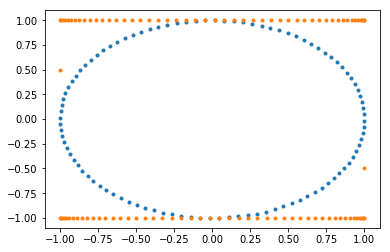

In [3]:
import numpy.polynomial.chebyshev as cheb

N_nodes = 100  #N+1 chebyshev nodes

nodes_cheb1 = cheb.chebpts1(N_nodes)  #array of N+1 nodes of 1st kind

weights_cheb1 = chebweights1(nodes_cheb1)  #corresponding weights for 1st kind

nodes_cheb2 = cheb.chebpts2(N_nodes)  #array of N+1 nodes of 2nd kind

weights_cheb2 = chebweights2(len(nodes_cheb2))  ##corresponding weights if 2nd kind

plt.plot(nodes_cheb1, weights_cheb1, '.')
plt.plot(nodes_cheb2, weights_cheb2, '.')


The above plot is simply to see how the weights are distributed as a function of nodes for the two kinds of Chebyshev nodes.

**Problem 1(c)**

**(i)** Here we interpolate the function $e^x$ using equi-spaced nodes.

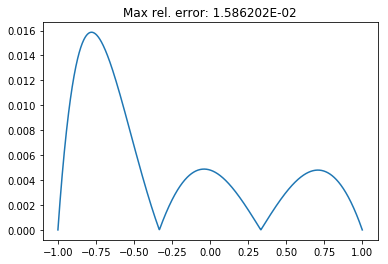

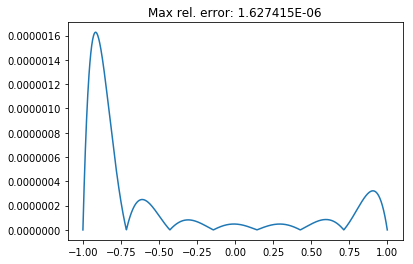

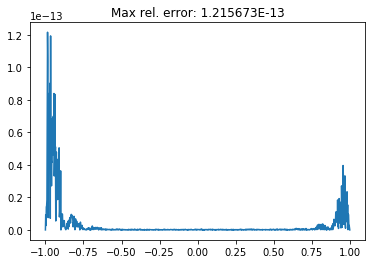

In [4]:
import numpy as np

node_list = [4,8,16]  #array containing the number of nodes for successive tests

x_interp = np.linspace(-1,1,1001)  #domain inclusive of -1 and +1

for N_nodes in node_list:
    x = np.linspace(-1,1,N_nodes) #constructing equally spaced nodes with -1 and +1
    
    b = BaryInterp(x,np.exp(x))
    rel_err = np.abs(np.exp(x_interp) - b.interp_lagrange(x_interp))/np.exp(x_interp)
    
    plt.figure()
    plt.plot(x_interp, rel_err)
    plt.title('Max rel. error: %E'%np.amax(rel_err))
    


Indeed we find that the error goes down as we increase the interpolating nodes.

**(ii)** Next we interpolate the function $\frac{1}{1 + 25 x^2}$

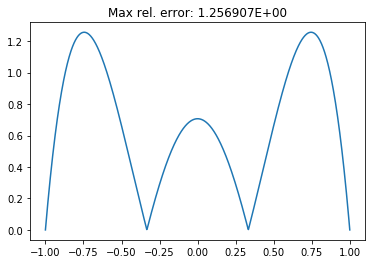

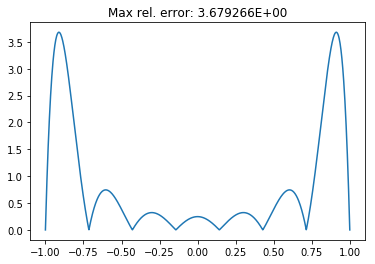

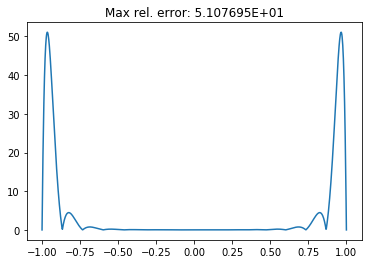

In [5]:
import numpy as np

node_list = [4,8,16]  #array containing the number of nodes for successive tests

x_interp = np.linspace(-1,1,1001)  #domain inclusive of -1 and +1

for N_nodes in node_list:
    x = np.linspace(-1,1,N_nodes) #constructing equally spaced nodes with -1 and +1
    
    b = BaryInterp(x,1.0/(1.0 + 25.0*(x**2)))
    
    rel_err = np.abs(1.0/(1 + 25.0*(x_interp**2)) - b.interp_lagrange(x_interp))/(1.0/(1 + 25.0*(x_interp**2)))
    
    plt.figure()
    plt.plot(x_interp, rel_err)
    plt.title('Max rel. error: %E'%np.amax(rel_err))


As indicated in the title, the maximum relative error increases as we increase the number of interpolating equispaced nodes.

**(iii)** Next, we carry out the $e^x$ interpolations but this time using Chebyshev nodes.

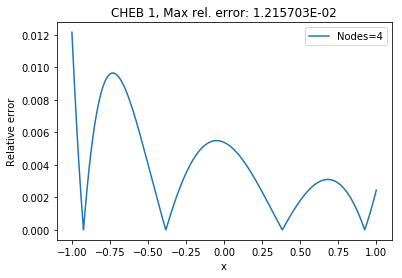

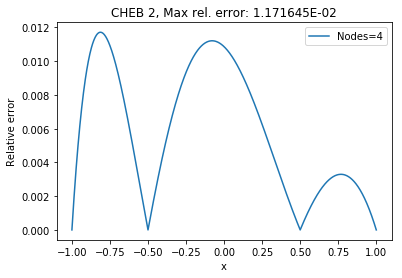

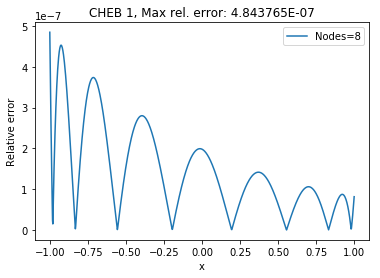

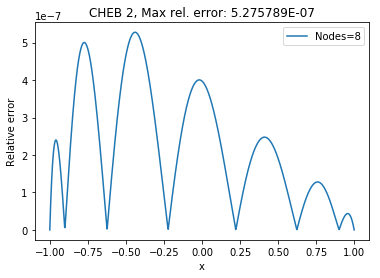

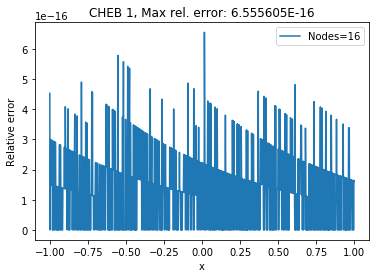

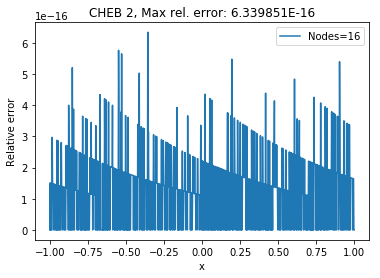

In [6]:
import numpy.polynomial.chebyshev as cheb

nodes_list = [4,8,16]

x_interp = np.linspace(-1,1,1001)

for N_nodes in nodes_list:

    nodes_cheb1 = cheb.chebpts1(N_nodes)

    weights_cheb1 = chebweights1(nodes_cheb1)

    nodes_cheb2 = cheb.chebpts2(N_nodes)

    weights_cheb2 = chebweights2(len(nodes_cheb2))

    f = lambda x: np.exp(x)

    b_cheb1 = BaryInterp(nodes_cheb1,f(nodes_cheb1),weights_cheb1)
    rel_err1 = np.abs(np.exp(x_interp) - b_cheb1.interp_lagrange(x_interp))/np.exp(x_interp)

    b_cheb2 = BaryInterp(nodes_cheb2,f(nodes_cheb2),weights_cheb2)
    rel_err2 = np.abs(np.exp(x_interp) - b_cheb2.interp_lagrange(x_interp))/np.exp(x_interp)
    
    plt.figure()
    plt.plot(x_interp, rel_err1,label='Nodes=%i'%N_nodes)
    plt.title('CHEB 1, Max rel. error: %E'%np.amax(rel_err1))
    plt.legend()
    plt.xlabel('x')
    plt.ylabel('Relative error')
    
    plt.figure()
    plt.plot(x_interp, rel_err2,label='Nodes=%i'%N_nodes)
    plt.title('CHEB 2, Max rel. error: %E'%np.amax(rel_err2))
    plt.legend()
    plt.xlabel('x')
    plt.ylabel('Relative error')

As seen from the plot labels above, for both kinds of Chebyshev nodes, the error drops drastically as the number of nodes are increased. The order of relative magnitudes of maximum error for both the kinds of Chebyshev nodes are similar.

However, it is to be noted that the relative errors are very large (or largest at times) at the domain boundary for the Chebyshev nodes of kind 1. Whereas, for the nodes of type 2, the error is zero or negligible at the boundaries. 

**(iv)** Chebyshev interpolation for $\frac{1}{1 + 25 x^2}$

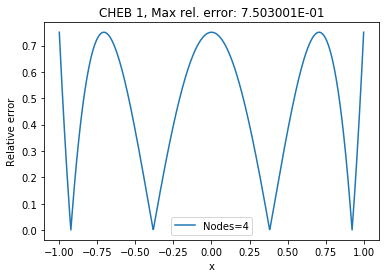

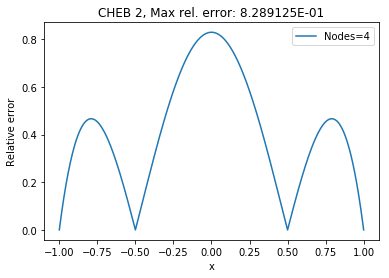

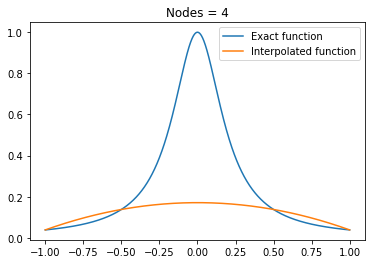

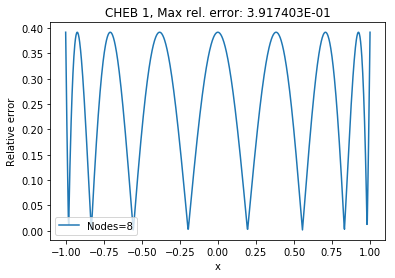

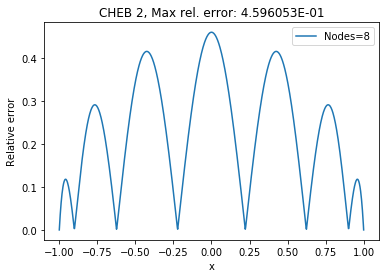

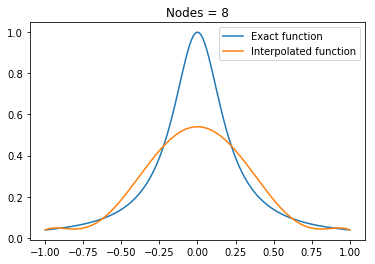

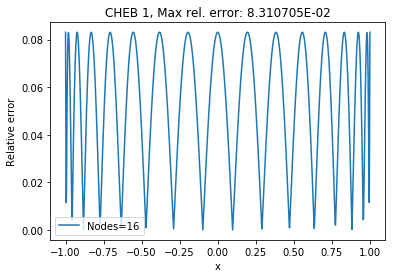

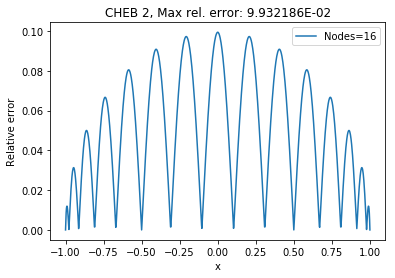

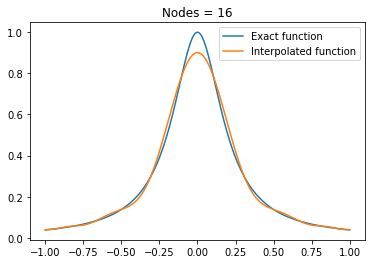

In [7]:
import numpy.polynomial.chebyshev as cheb

nodes_list = [4,8,16]

x_interp = np.linspace(-1,1,1001)

for N_nodes in nodes_list:

    nodes_cheb1 = cheb.chebpts1(N_nodes)

    weights_cheb1 = chebweights1(nodes_cheb1)

    nodes_cheb2 = cheb.chebpts2(N_nodes)

    weights_cheb2 = chebweights2(len(nodes_cheb2))

    f = lambda x: 1.0/(1.0 + 25.0*(x**2))

    b_cheb1 = BaryInterp(nodes_cheb1,f(nodes_cheb1),weights_cheb1)
    rel_err1 = np.abs(f(x_interp) - b_cheb1.interp_lagrange(x_interp))/f(x_interp)

    b_cheb2 = BaryInterp(nodes_cheb2,f(nodes_cheb2),weights_cheb2)
    rel_err2 = np.abs(f(x_interp) - b_cheb2.interp_lagrange(x_interp))/f(x_interp)
    
    plt.figure()
    plt.plot(x_interp, rel_err1,label='Nodes=%i'%N_nodes)
    plt.title('CHEB 1, Max rel. error: %E'%np.amax(rel_err1))
    plt.legend()
    plt.xlabel('x')
    plt.ylabel('Relative error')
    
    plt.figure()
    plt.plot(x_interp, rel_err2,label='Nodes=%i'%N_nodes)
    plt.title('CHEB 2, Max rel. error: %E'%np.amax(rel_err2))
    plt.legend()
    plt.xlabel('x')
    plt.ylabel('Relative error')
    
    plt.figure()
    plt.plot(x_interp, f(x_interp), label='Exact function')
    plt.plot(x_interp, b_cheb2.interp_lagrange(x_interp), label='Interpolated function')
    plt.title('Nodes = %i'%N_nodes)
    plt.legend()

**(d)(i) Convergence rate of Chebyshev interpolants**

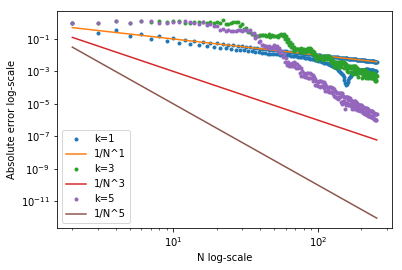

In [8]:
import numpy.polynomial.chebyshev as cheb

x_interp = np.linspace(-1,1,101)

def f1(x):
    return np.abs(x)
    
def f2(x):
    return np.abs(np.sin(5*np.pi*x))**3
    
def f3(x):
    return np.abs(np.sin(3*np.pi*x))**5

f_val = np.array([f1(x_interp),f2(x_interp),f3(x_interp)])
f = [f1, f2, f3]

#Array to store the absolute errors in each case
error_interp = np.zeros([3, 255])

for N_nodes in range(2, 257, 1):  #number of nodes go from 1 to 256
    
    nodes_cheb2 = cheb.chebpts2(N_nodes)
    weights_cheb2 = chebweights2(len(nodes_cheb2))
    
    for i in range(3):

        b_cheb2 = BaryInterp(nodes_cheb2, f[i](nodes_cheb2), weights_cheb2)

        error_interp[i, N_nodes - 2] = np.amax(np.abs(f_val[i,:] - b_cheb2.interp_lagrange(x_interp)))
    

for i in range(3):

    plt.loglog(np.array(range(2,257,1)),error_interp[i],'.',label='k=%i'%(2*i+1))
    plt.loglog(np.array(range(2,257,1)),1/(np.array(range(2,257,1)))**(2*i+1),'-',label='1/N^%i'%(2*i+1))
    plt.legend()
    plt.ylabel('Absolute error log-scale')
    plt.xlabel('N log-scale')

In the above plot, we find that the slope of the dotted lines (for a certain k) are asymptotically same as that of the corresponding 1/N^k in the log-log scale. That is, the log(absolute errors) do scale as -k log(N), i.e, errors ~ O($1/N^k$)

**(d)(ii) Convergence rate of Chebyshev interpolants**

* f1(x) = $\frac{1}{1 + 25x^2}$
* f2(x) = $\sqrt{x + 3}$
* f3(x) = tan(x)

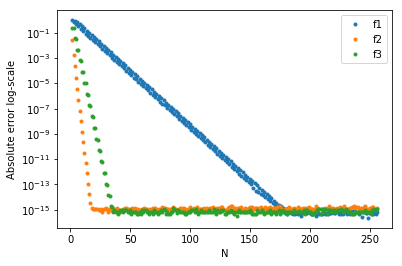

In [9]:
import numpy.polynomial.chebyshev as cheb

x_interp = np.linspace(-1,1,1001)

def f1(x):
    return 1.0/(1.0 + 25.0*(x**2))
    
def f2(x):
    return np.sqrt(x + 3)
    
def f3(x):
    return np.tan(x)

f_val = np.array([f1(x_interp),f2(x_interp),f3(x_interp)])
f = [f1, f2, f3]


error_interp = np.zeros([3, 255])

for N_nodes in range(2, 257, 1):  #number of nodes go from 1 to 256
    
    nodes_cheb2 = cheb.chebpts2(N_nodes)
    weights_cheb2 = chebweights2(len(nodes_cheb2))
    
    f_eval = [f[0](nodes_cheb2), f[1](nodes_cheb2), f[2](nodes_cheb2)]
    
    for i in range(3):

        b_cheb2 = BaryInterp(nodes_cheb2, f_eval[i], weights_cheb2)

        error_interp[i, N_nodes - 2] = np.amax(np.abs(f_val[i,:] - b_cheb2.interp_lagrange(x_interp)))
    

for i in range(3):

    plt.semilogy(np.array(range(2,257,1)),error_interp[i],'.',label='f%i'%(i+1))
    plt.ylabel('Absolute error log-scale')
    plt.xlabel('N')

plt.legend()
        

The plot for the log(absolute error) vs N shows as clear linear decrease until it levels off (due to rounding errors). Thus, this shows that log(absolute error) ~ -N x constant, i.e, absolute error ~ O($1/\tau^N$).

**(d)(iii) Convergence rate of Chebyshev interpolants**

* f1(x) = cosh(x)
* f2(x) = $e^{-x^2}$
* f3(x) = cos(100x)

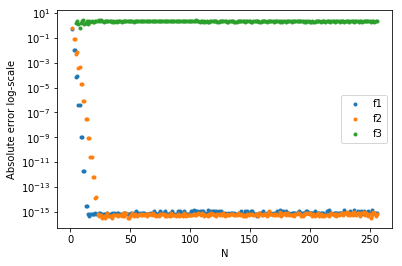

In [10]:
import numpy.polynomial.chebyshev as cheb

x_interp = np.linspace(-1,1,1001)

def f1(x):
    return np.cosh(x)
    
def f2(x):
    return np.exp(-(x**2))
    
def f3(x):
    return np.cos(100*np.pi*x)

f_val = np.array([f1(x_interp),f2(x_interp),f3(x_interp)])
f = [f1, f2, f3]


error_interp = np.zeros([3, 255])

for N_nodes in range(2, 257, 1):  #number of nodes go from 1 to 256
    
    nodes_cheb2 = cheb.chebpts2(N_nodes)
    weights_cheb2 = chebweights2(len(nodes_cheb2))
    
    f_eval = [f[0](nodes_cheb2), f[1](nodes_cheb2), f[2](nodes_cheb2)]
    
    for i in range(3):

        b_cheb2 = BaryInterp(nodes_cheb2, f_eval[i], weights_cheb2)

        error_interp[i, N_nodes - 2] = np.amax(np.abs(f_val[i,:] - b_cheb2.interp_lagrange(x_interp)))
    

for i in range(3):

    plt.semilogy(np.array(range(2,257,1)),error_interp[i],'.',label='f%i'%(i+1))
    plt.ylabel('Absolute error log-scale')
    plt.xlabel('N')

plt.legend()

Comment for f1(x) and f2(x):

The plot for the log(absolute error) vs N shows as clear linear decrease until it levels off (due to rounding errors). However, this time, we find that this decrease is faster than the pervious case. Thus, the spectral convergence is much faster than the geometric convergence.

Comment for f3(x):

This function has much more nodes in the domain than can be interpolated properly using even the maximum number of nodes (256). Thus, it never converge. 

**Increasing the number of interpolating nodes and inspecting f3(x):**

/home/srijan/anaconda3/lib/python3.6/site-packages/matplotlib/ticker.py:2198: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  "Data has no positive values, and therefore cannot be "


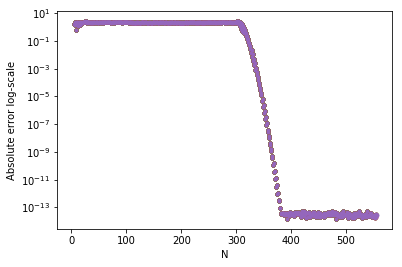

In [14]:
import numpy.polynomial.chebyshev as cheb

x_interp = np.linspace(-1,1,1001)

def f3(x):
    return np.cos(100*np.pi*x)

error_interp = np.zeros([555])
f_val = f3(x_interp)

for N_nodes in range(2, 557, 1):  #number of nodes go from 1 to 256
    
    nodes_cheb2 = cheb.chebpts2(N_nodes)
    weights_cheb2 = chebweights2(len(nodes_cheb2))
    
    f_eval = f3(nodes_cheb2)
    
    b_cheb2 = BaryInterp(nodes_cheb2, f_eval, weights_cheb2)

    error_interp[N_nodes - 2] = np.amax(np.abs(f_val[:] - b_cheb2.interp_lagrange(x_interp)))
    
    plt.semilogy(np.array(range(2,557,1)),error_interp,'.')
    plt.ylabel('Absolute error log-scale')
    plt.xlabel('N')


Thus, we find that for the function cos(100$\pi$x), the convergence occurs starting from ~ N=300.